In [1]:
%pip install numpy pandas matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Exploration of patients.csv dataset

In [ ]:
# We first explore the dataset patients.csv which contains information about patients in a hospital.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

patients = pd.read_csv('patients.csv')
patients.head()

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76


In [3]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      1000 non-null   object
 1   name            1000 non-null   object
 2   age             1000 non-null   int64 
 3   arrival_date    1000 non-null   object
 4   departure_date  1000 non-null   object
 5   service         1000 non-null   object
 6   satisfaction    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [4]:
patients.isnull().sum()

patient_id        0
name              0
age               0
arrival_date      0
departure_date    0
service           0
satisfaction      0
dtype: int64

In [5]:
patients.describe()

,age,satisfaction
count,1000.000000,1000.000000
mean,45.337000,79.597000
std,25.999912,11.550325
min,0.000000,60.000000
25%,23.000000,70.000000
50%,46.000000,80.000000
75%,68.000000,89.250000
max,89.000000,99.000000


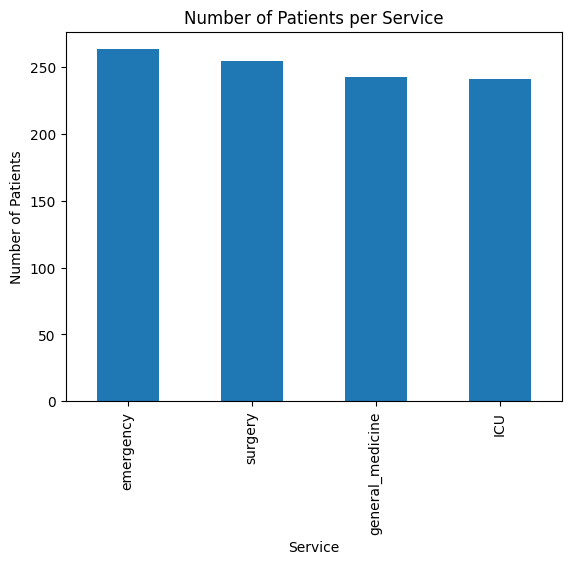

In [6]:
# Services the patients are using
patients['service'].value_counts().plot(kind='bar')
plt.title('Number of Patients per Service')
plt.xlabel('Service')
plt.ylabel('Number of Patients')
plt.show()


In [7]:
%pip install datetime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [datetime]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


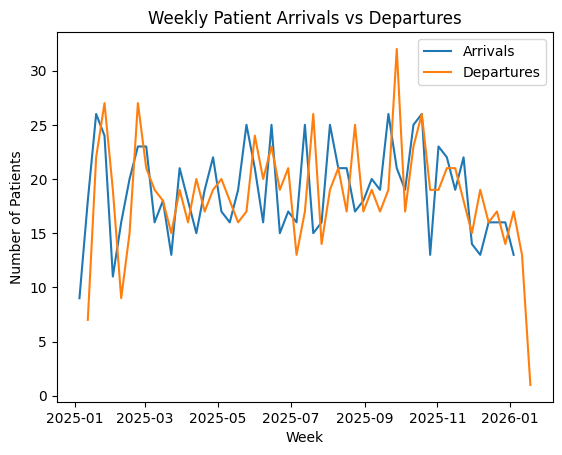

In [10]:
# Convert columns to datetime
patients['arrival_date'] = pd.to_datetime(patients['arrival_date'])
patients['departure_date'] = pd.to_datetime(patients['departure_date'])

# Weekly counts of arrivals and departures
weekly_arrivals = patients.groupby(pd.Grouper(key='arrival_date', freq='W')).size()
weekly_departures = patients.groupby(pd.Grouper(key='departure_date', freq='W')).size()

# Plot arrivals vs departures (no colors specified)
plt.figure()
plt.plot(weekly_arrivals, label='Arrivals')
plt.plot(weekly_departures, label='Departures')
plt.xlabel('Week')
plt.ylabel('Number of Patients')
plt.title('Weekly Patient Arrivals vs Departures')
plt.legend()
plt.show()

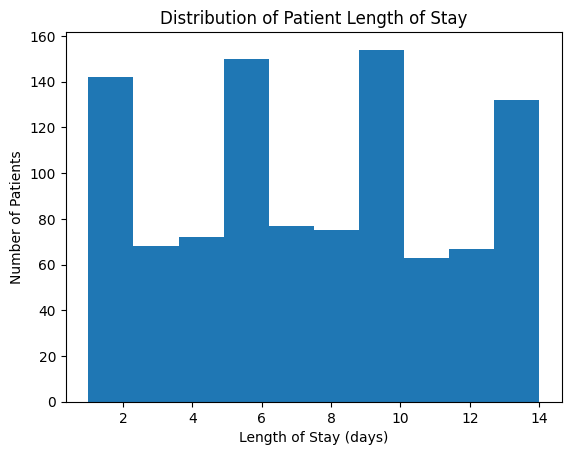

In [11]:
# 2. Length of Stay Calculation
patients['length_of_stay'] = (patients['departure_date'] - patients['arrival_date']).dt.days

# Plot Length of Stay Distribution (Histogram)
plt.figure()
plt.hist(patients['length_of_stay'].dropna())
plt.xlabel('Length of Stay (days)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patient Length of Stay')
plt.show()

<Figure size 640x480 with 0 Axes>

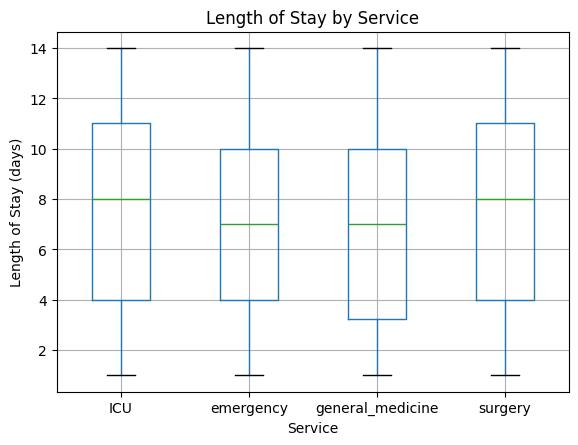

In [12]:
# 3. Length of Stay per Department (Boxplot)
plt.figure()
patients.boxplot(column='length_of_stay', by='service')
plt.xlabel('Service')
plt.ylabel('Length of Stay (days)')
plt.title('Length of Stay by Service')
plt.suptitle('')  # Remove automatic extra title
plt.show()

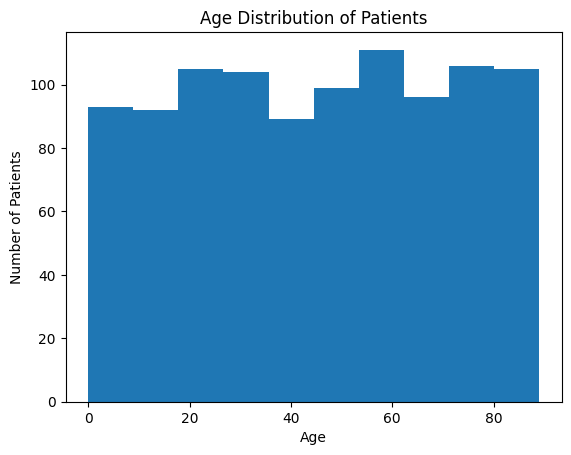

In [13]:
# 5. Age Distribution (Histogram)
plt.figure()
plt.hist(patients['age'].dropna())
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Patients')
plt.show()

<Figure size 640x480 with 0 Axes>

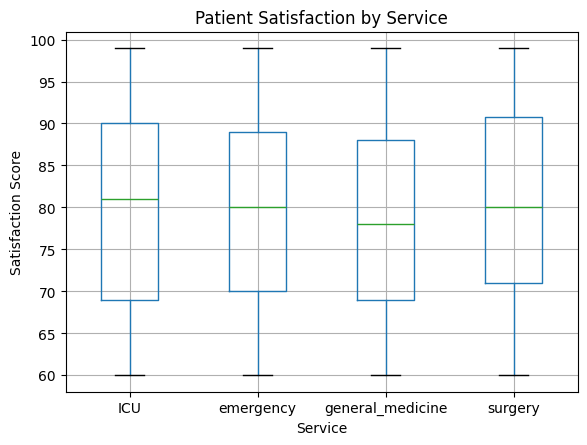

In [14]:
# 6. Satisfaction by Department (Boxplot)
plt.figure()
patients.boxplot(column='satisfaction', by='service')
plt.xlabel('Service')
plt.ylabel('Satisfaction Score')
plt.title('Patient Satisfaction by Service')
plt.suptitle('')
plt.show()

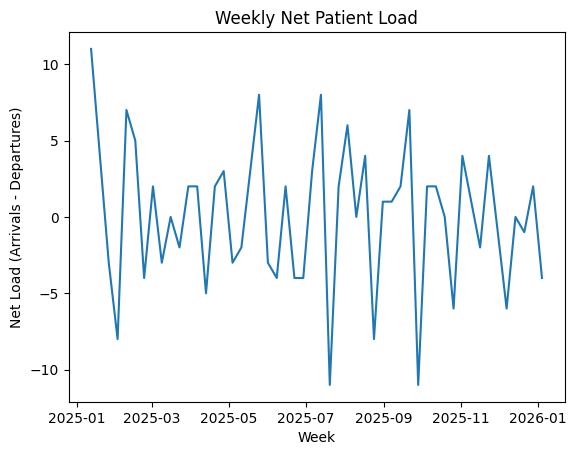

In [15]:
# 7. Net Load Over Time (Arrivals - Departures per week)
weekly_arrivals = patients.groupby(pd.Grouper(key='arrival_date', freq='W')).size()
weekly_departures = patients.groupby(pd.Grouper(key='departure_date', freq='W')).size()
net_load = weekly_arrivals - weekly_departures

plt.figure()
plt.plot(net_load)
plt.xlabel('Week')
plt.ylabel('Net Load (Arrivals - Departures)')
plt.title('Weekly Net Patient Load')
plt.show()

### Exploration of services_weekly dataset

In [19]:
services_weekly = pd.read_csv('services_weekly.csv')
services_weekly

,week,month,service,available_beds,patients_request,patients_admitted,patients_refused,patient_satisfaction,staff_morale,event
0,1,1,emergency,32,76,32,44,67,70,none
1,1,1,surgery,45,130,45,85,83,78,flu
2,1,1,general_medicine,37,201,37,164,97,43,flu
3,1,1,ICU,22,31,22,9,84,91,flu
4,2,1,emergency,28,169,28,141,75,64,none
...,...,...,...,...,...,...,...,...,...,...
203,51,12,ICU,18,15,15,0,87,80,none
204,52,12,emergency,26,130,26,104,88,63,none
205,52,12,surgery,53,39,39,0,82,50,none
206,52,12,general_medicine,65,225,65,160,82,40,flu


In [17]:
services_weekly.columns


Index(['week', 'month', 'service', 'available_beds', 'patients_request',
       'patients_admitted', 'patients_refused', 'patient_satisfaction',
       'staff_morale', 'event'],
      dtype='object')

In [18]:
services_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   week                  208 non-null    int64 
 1   month                 208 non-null    int64 
 2   service               208 non-null    object
 3   available_beds        208 non-null    int64 
 4   patients_request      208 non-null    int64 
 5   patients_admitted     208 non-null    int64 
 6   patients_refused      208 non-null    int64 
 7   patient_satisfaction  208 non-null    int64 
 8   staff_morale          208 non-null    int64 
 9   event                 208 non-null    object
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [20]:
services_weekly.describe()

,week,month,available_beds,patients_request,patients_admitted,patients_refused,patient_satisfaction,staff_morale
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,26.500000,6.923077,30.346154,64.870192,28.129808,36.740385,80.000000,72.567308
std,15.044539,3.634755,15.172929,58.738572,14.676791,55.015763,11.125546,15.457759
min,1.000000,1.000000,8.000000,5.000000,5.000000,0.000000,60.000000,31.000000
25%,13.750000,4.000000,18.000000,23.750000,16.000000,0.000000,70.000000,60.000000
50%,26.500000,7.000000,27.500000,49.000000,26.000000,13.500000,81.000000,73.000000
75%,39.250000,10.000000,40.000000,86.000000,37.000000,52.500000,89.000000,86.000000
max,52.000000,12.000000,74.000000,388.000000,74.000000,363.000000,99.000000,99.000000


Average Occupancy Rate per Service:
service
ICU                 0.843816
surgery             0.881868
general_medicine    0.973136
emergency           1.000000
Name: occupancy_rate, dtype: float64


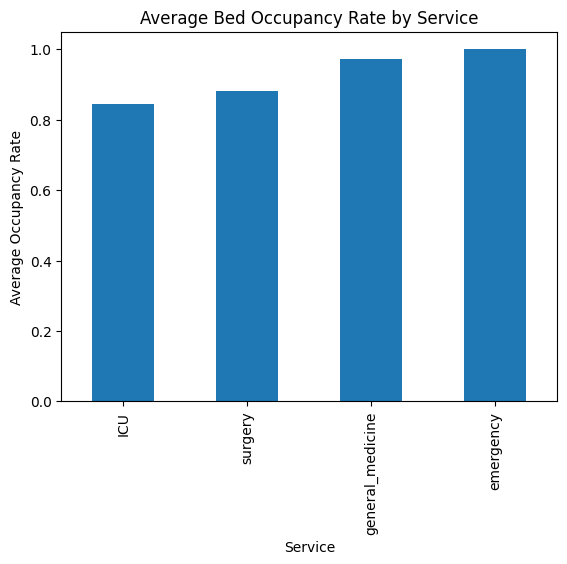

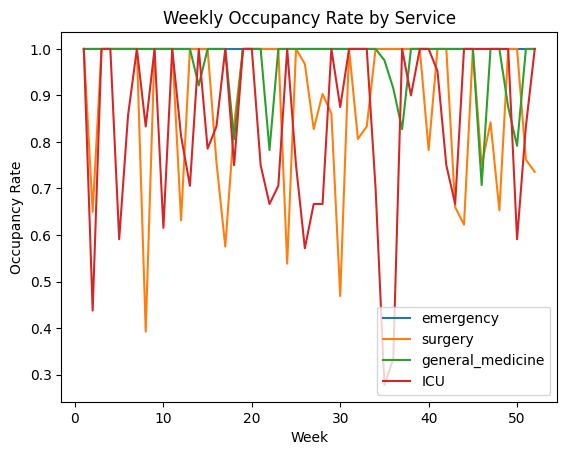

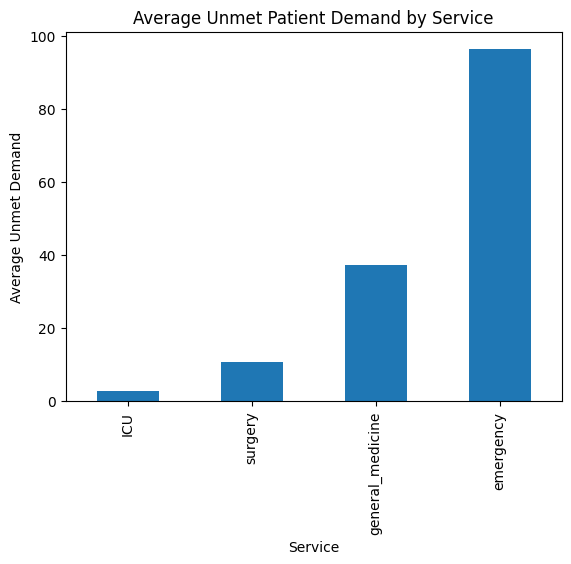

In [21]:
# 1. Compute occupancy rate (patients_admitted / available_beds)
services_weekly['occupancy_rate'] = services_weekly['patients_admitted'] / services_weekly['available_beds']

# 2. Compute unmet demand (patients_request - patients_admitted)
services_weekly['unmet_demand'] = services_weekly['patients_request'] - services_weekly['patients_admitted']

# 3. Average occupancy rate per service (Table)
avg_occupancy = services_weekly.groupby('service')['occupancy_rate'].mean().sort_values()

print("Average Occupancy Rate per Service:")
print(avg_occupancy)

# 4. Plot average occupancy rate per service (Bar Plot)
plt.figure()
avg_occupancy.plot(kind='bar')
plt.xlabel('Service')
plt.ylabel('Average Occupancy Rate')
plt.title('Average Bed Occupancy Rate by Service')
plt.show()

# 5. Plot weekly occupancy trends (line plot by service)
plt.figure()
for svc in services_weekly['service'].unique():
    svc_data = services_weekly[services_weekly['service'] == svc].sort_values('week')
    plt.plot(svc_data['week'], svc_data['occupancy_rate'], label=svc)
plt.xlabel('Week')
plt.ylabel('Occupancy Rate')
plt.title('Weekly Occupancy Rate by Service')
plt.legend()
plt.show()

# 6. Unmet demand per service (Bar Plot of average)
avg_unmet = services_weekly.groupby('service')['unmet_demand'].mean().sort_values()

plt.figure()
avg_unmet.plot(kind='bar')
plt.xlabel('Service')
plt.ylabel('Average Unmet Demand')
plt.title('Average Unmet Patient Demand by Service')
plt.show()


### Exploration of staff_schedule.csv dataset

In [22]:
staff_schedule = pd.read_csv('staff_schedule.csv')
staff_schedule

,week,staff_id,staff_name,role,service,present
0,1,STF-b77cdc60,Allison Hill,doctor,emergency,1
1,2,STF-b77cdc60,Allison Hill,doctor,emergency,1
2,3,STF-b77cdc60,Allison Hill,doctor,emergency,0
3,4,STF-b77cdc60,Allison Hill,doctor,emergency,1
4,5,STF-b77cdc60,Allison Hill,doctor,emergency,1
...,...,...,...,...,...,...
6547,48,STF-302eb752,Erin Edwards,nursing_assistant,ICU,0
6548,49,STF-302eb752,Erin Edwards,nursing_assistant,ICU,1
6549,50,STF-302eb752,Erin Edwards,nursing_assistant,ICU,1
6550,51,STF-302eb752,Erin Edwards,nursing_assistant,ICU,0


In [23]:
staff_schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6552 entries, 0 to 6551
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week        6552 non-null   int64 
 1   staff_id    6552 non-null   object
 2   staff_name  6552 non-null   object
 3   role        6552 non-null   object
 4   service     6552 non-null   object
 5   present     6552 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 307.3+ KB


In [24]:
staff_schedule.columns


Index(['week', 'staff_id', 'staff_name', 'role', 'service', 'present'], dtype='object')

In [25]:
# Identification of roles
staff_schedule['role'].value_counts()

role
nurse                3796
nursing_assistant    1612
doctor               1144
Name: count, dtype: int64

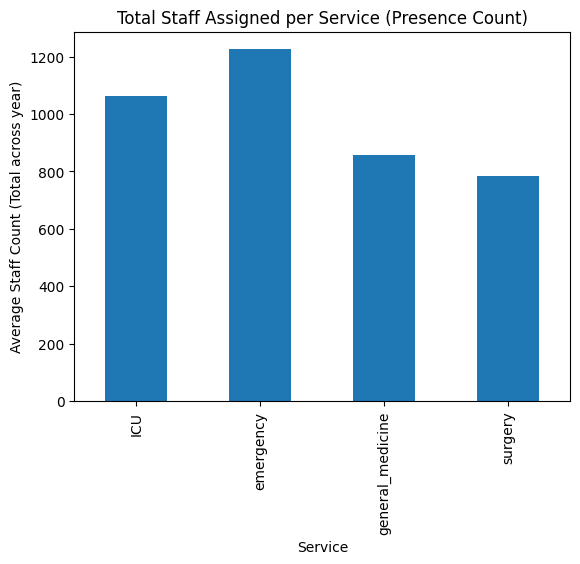

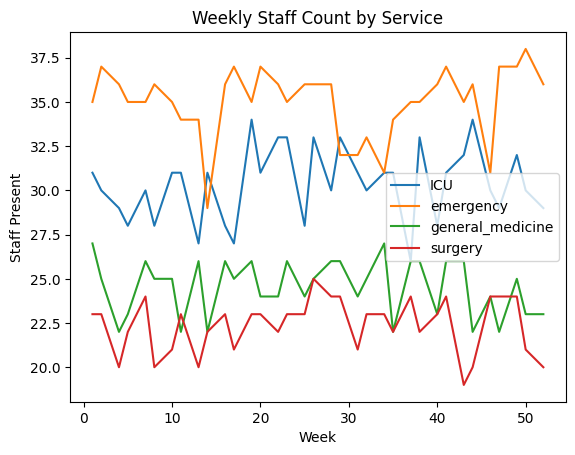

<Figure size 640x480 with 0 Axes>

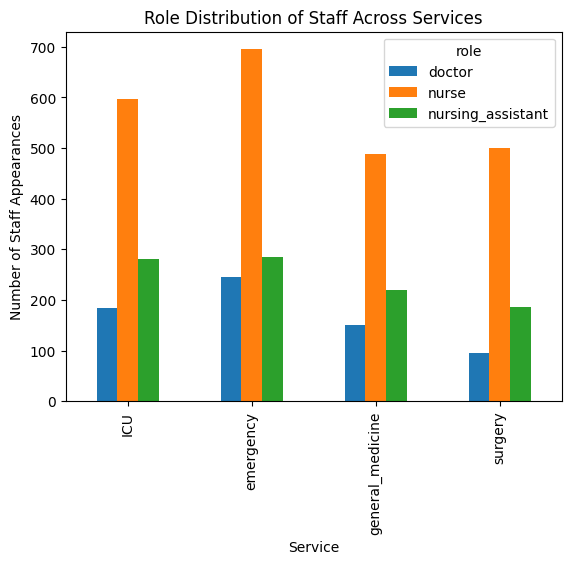

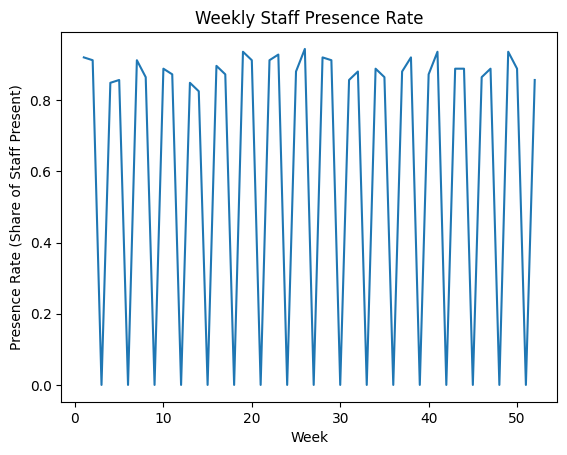

In [26]:
# Ensure 'present' is numeric
staff_schedule['present'] = staff_schedule['present'].astype(int)

# 1. Average staff per service (overall)
avg_staff_per_service = staff_schedule[staff_schedule['present'] == 1].groupby('service')['staff_id'].count()

plt.figure()
avg_staff_per_service.plot(kind='bar')
plt.xlabel('Service')
plt.ylabel('Average Staff Count (Total across year)')
plt.title('Total Staff Assigned per Service (Presence Count)')
plt.show()

# 2. Staff per service per week (line plot)
staff_weekly = staff_schedule[staff_schedule['present'] == 1].groupby(['week', 'service'])['staff_id'].count().reset_index()

plt.figure()
for svc in staff_weekly['service'].unique():
    data = staff_weekly[staff_weekly['service'] == svc]
    plt.plot(data['week'], data['staff_id'], label=svc)

plt.xlabel('Week')
plt.ylabel('Staff Present')
plt.title('Weekly Staff Count by Service')
plt.legend()
plt.show()

# 3. Role distribution by service (grouped bar)
role_dist = staff_schedule[staff_schedule['present'] == 1].groupby(['service', 'role'])['staff_id'].count().unstack(fill_value=0)

plt.figure()
role_dist.plot(kind='bar')
plt.xlabel('Service')
plt.ylabel('Number of Staff Appearances')
plt.title('Role Distribution of Staff Across Services')
plt.show()

# 4. Weekly presence rate (percentage of staff present each week)
weekly_presence = staff_schedule.groupby('week')['present'].mean()

plt.figure()
plt.plot(weekly_presence)
plt.xlabel('Week')
plt.ylabel('Presence Rate (Share of Staff Present)')
plt.title('Weekly Staff Presence Rate')
plt.show()

### Exploration of staff.csv dataset

In [27]:
staff = pd.read_csv('staff.csv')
staff

,staff_id,staff_name,role,service
0,STF-5ca26577,Allison Hill,doctor,emergency
1,STF-02ae59ca,Noah Rhodes,doctor,emergency
2,STF-d8006e7c,Angie Henderson,doctor,emergency
3,STF-212d8b31,Daniel Wagner,doctor,emergency
4,STF-107a58e4,Cristian Santos,doctor,emergency
...,...,...,...,...
105,STF-2c8a995d,Marc Moore,nursing_assistant,ICU
106,STF-251c7770,Sharon Cherry,nursing_assistant,ICU
107,STF-3fb56209,Sierra Johnson,nursing_assistant,ICU
108,STF-a8c30e00,Evelyn Galvan,nursing_assistant,ICU


In [28]:
staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   staff_id    110 non-null    object
 1   staff_name  110 non-null    object
 2   role        110 non-null    object
 3   service     110 non-null    object
dtypes: object(4)
memory usage: 3.6+ KB


In [29]:
staff.columns

Index(['staff_id', 'staff_name', 'role', 'service'], dtype='object')

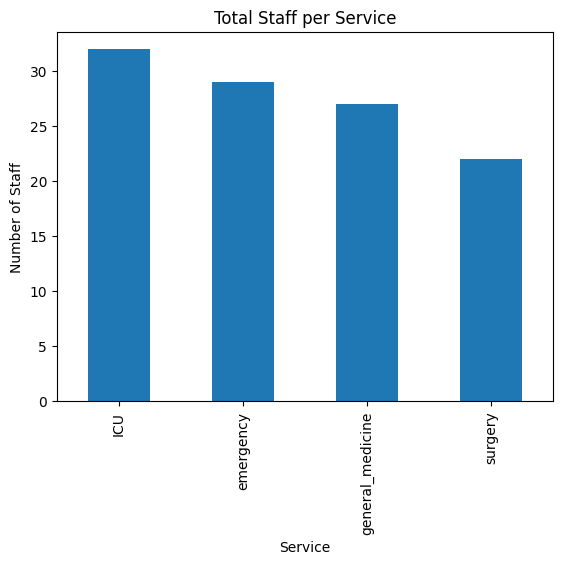

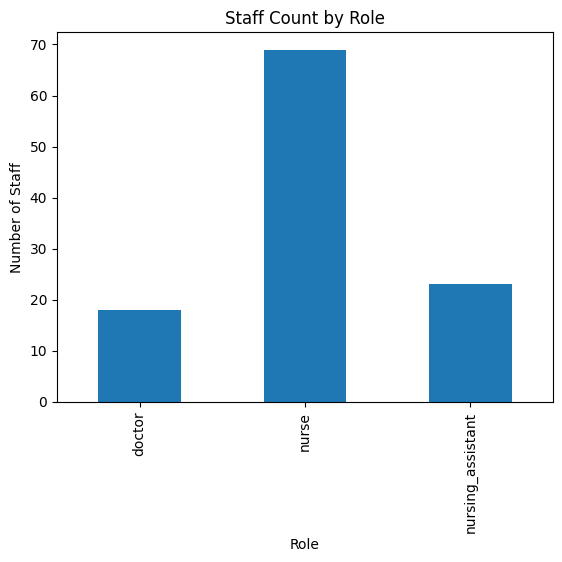

<Figure size 640x480 with 0 Axes>

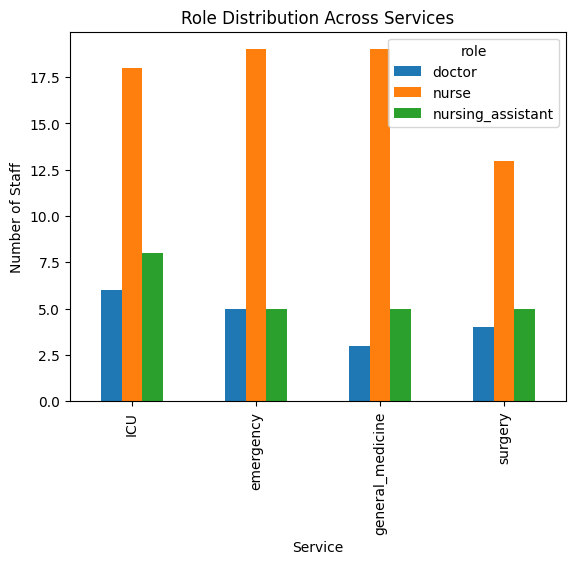

role,doctor,nurse,nursing_assistant
service,,,
ICU,6,18,8
emergency,5,19,5
general_medicine,3,19,5
surgery,4,13,5


In [30]:
# 1. Staff count per service
staff_per_service = staff.groupby('service')['staff_id'].count()
plt.figure()
staff_per_service.plot(kind='bar')
plt.xlabel('Service')
plt.ylabel('Number of Staff')
plt.title('Total Staff per Service')
plt.show()

# 2. Staff count by role
staff_per_role = staff.groupby('role')['staff_id'].count()
plt.figure()
staff_per_role.plot(kind='bar')
plt.xlabel('Role')
plt.ylabel('Number of Staff')
plt.title('Staff Count by Role')
plt.show()

# 3. Role distribution by service (grouped bar)
role_service = staff.groupby(['service', 'role']).count()['staff_id'].unstack(fill_value=0)
plt.figure()
role_service.plot(kind='bar')
plt.xlabel('Service')
plt.ylabel('Number of Staff')
plt.title('Role Distribution Across Services')
plt.show()

# 4. Summary table
role_service